<a href="https://colab.research.google.com/github/jialush/6189HW/blob/master/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping


In [33]:
#import data
from google.colab import files
uploaded=files.upload()


Saving TSLA.csv to TSLA (1).csv


In [34]:
import io
df=pd.read_csv(io.StringIO(uploaded['TSLA.csv'].decode('utf-8')),sep=',')
df.shape
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-09,51.816002,52.590000,51.358002,51.584000,51.584000,16670500
1,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
2,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
3,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
4,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000


In [5]:
#split dataset to training and testing
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

In [6]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
test_set = sc.fit_transform(test_set)

# 1 day lag 60 time-step
## dropout rate-0.2, epoch=100, number of layers=5  
### training error=0.0029

In [50]:
# Creating a data structure with 60 time-steps and 1-day output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) #1 day lag
    
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [51]:
X_train.shape[1]

60

In [52]:
#Bubild the LSTM Model

model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 1s 55ms/step - loss: 0.0621
Epoch 2/100
24/24 [==============================] - 1s 54ms/step - loss: 0.0165
Epoch 3/100
24/24 [==============================] - 1s 54ms/step - loss: 0.0125
Epoch 4/100
24/24 [==============================] - 1s 55ms/step - loss: 0.0122
Epoch 5/100
24/24 [==============================] - 1s 54ms/step - loss: 0.0124
Epoch 6/100
24/24 [==============================] - 1s 55ms/step - loss: 0.0126
Epoch 7/100
24/24 [==============================] - 1s 55ms/step - loss: 0.0113
Epoch 8/100
24/24 [==============================] - 1s 54ms/step - loss: 0.0107
Epoch 9/100
24/24 [==============================] - 1s 55ms/step - loss: 0.0114
Epoch 10/100
24/24 [==============================] - 1s 55ms/step - loss: 0.0099
Epoch 11/100
24/24 [==============================] - 1s 55ms/step - loss: 0.0102
Epoch 12/100
24/24 [==============================] - 1s 54ms/step - loss: 0.0093
Epoch 13/100
24/24 [=====

In [53]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]

dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
Y_test = []
for i in range(60, 588):
    X_test.append(inputs[i-60:i, 0])
    Y_test.append(inputs[i, 0])
X_test = np.array(X_test)
Y_test = np.array(Y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [54]:
#Make Predictions using the test set
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

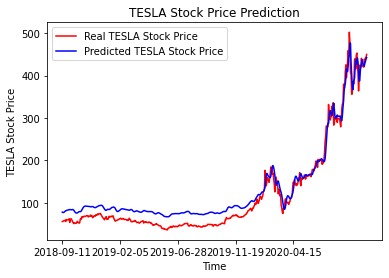

In [56]:
# Visualising the results
plt.plot(df.loc[800:, "Date"],dataset_test.values, color = "red" , label = "Real TESLA Stock Price")
plt.plot(df.loc[800:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,459,100))
plt.title("TESLA Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("TESLA Stock Price")
plt.legend()
plt.show()

# 1 day lag 30 time-step
## dropout rate-0.2, epoch=100, number of layers=5  
### training error=0.0028
### Shortening time-step doesn't significant improve test error (can be observed in Plot)

Epoch 1/100
25/25 [==============================] - 1s 32ms/step - loss: 0.0817
Epoch 2/100
25/25 [==============================] - 1s 33ms/step - loss: 0.0176
Epoch 3/100
25/25 [==============================] - 1s 33ms/step - loss: 0.0139
Epoch 4/100
25/25 [==============================] - 1s 32ms/step - loss: 0.0123
Epoch 5/100
25/25 [==============================] - 1s 32ms/step - loss: 0.0131
Epoch 6/100
25/25 [==============================] - 1s 32ms/step - loss: 0.0121
Epoch 7/100
25/25 [==============================] - 1s 32ms/step - loss: 0.0109
Epoch 8/100
25/25 [==============================] - 1s 32ms/step - loss: 0.0111
Epoch 9/100
25/25 [==============================] - 1s 32ms/step - loss: 0.0114
Epoch 10/100
25/25 [==============================] - 1s 32ms/step - loss: 0.0101
Epoch 11/100
25/25 [==============================] - 1s 33ms/step - loss: 0.0110
Epoch 12/100
25/25 [==============================] - 1s 32ms/step - loss: 0.0125
Epoch 13/100
25/25 [=====

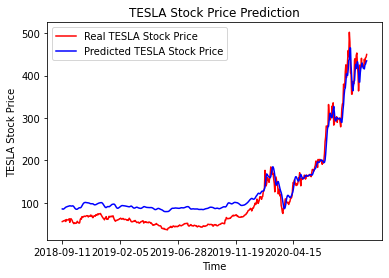

In [58]:
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(30, 800):
    X_train.append(training_set_scaled[i-30:i, 0])
    y_train.append(training_set_scaled[i, 0]) #1 day lag
    
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 30, 1)
#Bubild the LSTM Model

model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 30:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
Y_test = []
for i in range(30, 558):
    X_test.append(inputs[i-30:i, 0])
    Y_test.append(inputs[i, 0])
X_test = np.array(X_test)
Y_test = np.array(Y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Make Predictions using the test set
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
# Visualising the results
plt.plot(df.loc[800:, "Date"],dataset_test.values, color = "red" , label = "Real TESLA Stock Price")
plt.plot(df.loc[800:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,459,100))
plt.title("TESLA Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("TESLA Stock Price")
plt.legend()
plt.show()

# 1 day lag 60 time-step
## dropout rate=0.05, epoch=100, number of layers=5  
### training error=0.0020
### Decrease dropout rate doesn't improves of test error (can be observed in Plot)

Epoch 1/100
24/24 [==============================] - 1s 53ms/step - loss: 0.0779
Epoch 2/100
24/24 [==============================] - 1s 55ms/step - loss: 0.0147
Epoch 3/100
24/24 [==============================] - 1s 54ms/step - loss: 0.0104
Epoch 4/100
24/24 [==============================] - 1s 54ms/step - loss: 0.0095
Epoch 5/100
24/24 [==============================] - 1s 55ms/step - loss: 0.0092
Epoch 6/100
24/24 [==============================] - 1s 55ms/step - loss: 0.0098
Epoch 7/100
24/24 [==============================] - 1s 56ms/step - loss: 0.0097
Epoch 8/100
24/24 [==============================] - 1s 55ms/step - loss: 0.0103
Epoch 9/100
24/24 [==============================] - 1s 55ms/step - loss: 0.0087
Epoch 10/100
24/24 [==============================] - 1s 55ms/step - loss: 0.0090
Epoch 11/100
24/24 [==============================] - 1s 55ms/step - loss: 0.0082
Epoch 12/100
24/24 [==============================] - 1s 55ms/step - loss: 0.0075
Epoch 13/100
24/24 [=====

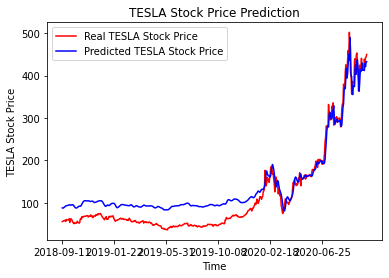

In [59]:


# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) #1 day lag
    
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 30, 1)
#Bubild the LSTM Model

model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.05))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.05))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.05))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.05))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
Y_test = []
for i in range(60, 588):
    X_test.append(inputs[i-60:i, 0])
    Y_test.append(inputs[i, 0])
X_test = np.array(X_test)
Y_test = np.array(Y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Make Predictions using the test set
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
# Visualising the results
plt.plot(df.loc[800:, "Date"],dataset_test.values, color = "red" , label = "Real TESLA Stock Price")
plt.plot(df.loc[800:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,459,90))
plt.title("TESLA Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("TESLA Stock Price")
plt.legend()
plt.show()

# 1 day lag 60 time-step
## dropout rate-0.2, epoch=200, number of layers=5  
### training error=0.0014
### Increase epoch significant improves of test error (can be observed in Plot)


Epoch 1/200
24/24 [==============================] - 1s 54ms/step - loss: 0.0585
Epoch 2/200
24/24 [==============================] - 1s 55ms/step - loss: 0.0132
Epoch 3/200
24/24 [==============================] - 1s 56ms/step - loss: 0.0099
Epoch 4/200
24/24 [==============================] - 1s 56ms/step - loss: 0.0097
Epoch 5/200
24/24 [==============================] - 1s 55ms/step - loss: 0.0094
Epoch 6/200
24/24 [==============================] - 1s 55ms/step - loss: 0.0090
Epoch 7/200
24/24 [==============================] - 1s 54ms/step - loss: 0.0091
Epoch 8/200
24/24 [==============================] - 1s 55ms/step - loss: 0.0104
Epoch 9/200
24/24 [==============================] - 1s 55ms/step - loss: 0.0085
Epoch 10/200
24/24 [==============================] - 1s 55ms/step - loss: 0.0080
Epoch 11/200
24/24 [==============================] - 1s 55ms/step - loss: 0.0068
Epoch 12/200
24/24 [==============================] - 1s 55ms/step - loss: 0.0095
Epoch 13/200
24/24 [=====

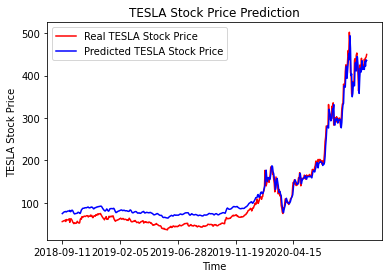

In [61]:
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) #1 day lag
    
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 30, 1)
#Bubild the LSTM Model

model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.05))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.05))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.05))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.05))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 200, batch_size = 32)
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
Y_test = []
for i in range(60, 588):
    X_test.append(inputs[i-60:i, 0])
    Y_test.append(inputs[i, 0])
X_test = np.array(X_test)
Y_test = np.array(Y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Make Predictions using the test set
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
# Visualising the results
plt.plot(df.loc[800:, "Date"],dataset_test.values, color = "red" , label = "Real TESLA Stock Price")
plt.plot(df.loc[800:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,459,100))
plt.title("TESLA Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("TESLA Stock Price")
plt.legend()
plt.show()

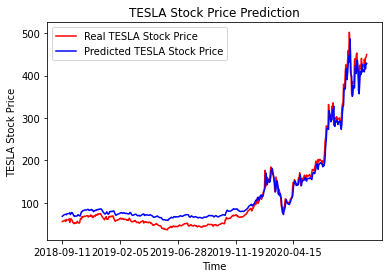

In [49]:
# Visualising the results
plt.plot(df.loc[800:, "Date"],dataset_test.values, color = "red" , label = "Real TESLA Stock Price")
plt.plot(df.loc[800:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,459,100))
plt.title("TESLA Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("TESLA Stock Price")
plt.legend()
plt.show()

# 7 days lag 60 time step: 
## dropout rate=0.2, epoch=100, number of layers=5  
### training error=0.0050

In [ ]:
p=7-1 #lag days-1

In [62]:
# Creating a data structure with 60 time-steps and 7-lag day output
X_train = []
y_train = []
for i in range(60, 800-p):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i+p, 0]) #7 day lag

In [63]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(734=800-(p-1), 60, 1)

In [64]:
#Bubild the LSTM Model

model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
history=model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
23/23 [==============================] - 1s 53ms/step - loss: 0.0653
Epoch 2/100
23/23 [==============================] - 1s 53ms/step - loss: 0.0247
Epoch 3/100
23/23 [==============================] - 1s 56ms/step - loss: 0.0205
Epoch 4/100
23/23 [==============================] - 1s 56ms/step - loss: 0.0193
Epoch 5/100
23/23 [==============================] - 1s 56ms/step - loss: 0.0185
Epoch 6/100
23/23 [==============================] - 1s 54ms/step - loss: 0.0191
Epoch 7/100
23/23 [==============================] - 1s 55ms/step - loss: 0.0196
Epoch 8/100
23/23 [==============================] - 1s 55ms/step - loss: 0.0189
Epoch 9/100
23/23 [==============================] - 1s 55ms/step - loss: 0.0188
Epoch 10/100
23/23 [==============================] - 1s 54ms/step - loss: 0.0193
Epoch 11/100
23/23 [==============================] - 1s 54ms/step - loss: 0.0189
Epoch 12/100
23/23 [==============================] - 1s 56ms/step - loss: 0.0169
Epoch 13/100
23/23 [=====

In [65]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800-p, 1:2]
dataset_test = df.iloc[800-p:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
Y_test = []
for i in range(60, 588-p):
    X_test.append(inputs[i-60:i, 0])
    Y_test.append(inputs[i, 0])
X_test = np.array(X_test)
Y_test = np.array(Y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
print(Y_test.shape)
# (459, 60, 1)

(514, 60, 1)
(514,)


In [66]:
#Make Predictions using the test set
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price.shape)

(514, 1)


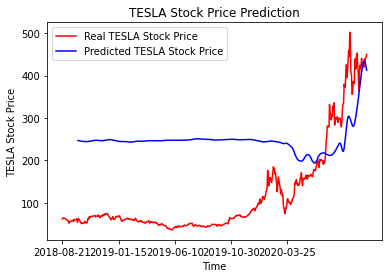

In [67]:
# Visualising the results
plt.plot(df.loc[800-p:, "Date"],dataset_test.values, color = "red" , label = "Real TESLA Stock Price")
plt.plot(df.loc[800+p:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,459,100))
plt.title("TESLA Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("TESLA Stock Price")
plt.legend()
plt.show()


# 7 days lag 60 time step: 
## dropout rate=0.2, epoch=100, number of layers=5  
### training error=0.0067
### Increase dropout rate worsen test error (can be observed in Plot)

Epoch 1/100
23/23 [==============================] - 0s 16ms/step - loss: 0.0743
Epoch 2/100
23/23 [==============================] - 0s 13ms/step - loss: 0.0234
Epoch 3/100
23/23 [==============================] - 0s 13ms/step - loss: 0.0197
Epoch 4/100
23/23 [==============================] - 0s 14ms/step - loss: 0.0177
Epoch 5/100
23/23 [==============================] - 0s 13ms/step - loss: 0.0177
Epoch 6/100
23/23 [==============================] - 0s 13ms/step - loss: 0.0171
Epoch 7/100
23/23 [==============================] - 0s 14ms/step - loss: 0.0180
Epoch 8/100
23/23 [==============================] - 0s 13ms/step - loss: 0.0172
Epoch 9/100
23/23 [==============================] - 0s 13ms/step - loss: 0.0177
Epoch 10/100
23/23 [==============================] - 0s 13ms/step - loss: 0.0170
Epoch 11/100
23/23 [==============================] - 0s 13ms/step - loss: 0.0177
Epoch 12/100
23/23 [==============================] - 0s 13ms/step - loss: 0.0173
Epoch 13/100
23/23 [=====

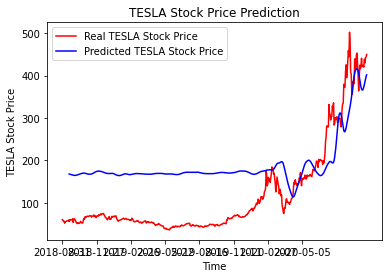

In [ ]:
#Bubild the LSTM Model

model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.3))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.3))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.3))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.3))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800-p, 1:2]
dataset_test = df.iloc[800-p:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
Y_test = []
for i in range(60, 588-p):
    X_test.append(inputs[i-60:i, 0])
    Y_test.append(inputs[i, 0])
X_test = np.array(X_test)
Y_test = np.array(Y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
print(Y_test.shape)
# (459, 60, 1)

#Make Predictions using the test set
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price.shape)

# Visualising the results
plt.plot(df.loc[800-p:, "Date"],dataset_test.values, color = "red" , label = "Real TESLA Stock Price")
plt.plot(df.loc[800+p:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,459,60))
plt.title("TESLA Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("TESLA Stock Price")
plt.legend()
plt.show()



# 7 days lag 60 time step: 
## dropout rate=0.3, epoch=100, number of layers=5  
### training error=0.0024
### Increase epoch significant improves test error (can be observed in Plot)

Epoch 1/200
23/23 [==============================] - 0s 17ms/step - loss: 0.0747
Epoch 2/200
23/23 [==============================] - 0s 13ms/step - loss: 0.0199
Epoch 3/200
23/23 [==============================] - 0s 14ms/step - loss: 0.0169
Epoch 4/200
23/23 [==============================] - 0s 13ms/step - loss: 0.0169
Epoch 5/200
23/23 [==============================] - 0s 13ms/step - loss: 0.0152
Epoch 6/200
23/23 [==============================] - 0s 13ms/step - loss: 0.0157
Epoch 7/200
23/23 [==============================] - 0s 13ms/step - loss: 0.0153
Epoch 8/200
23/23 [==============================] - 0s 13ms/step - loss: 0.0142
Epoch 9/200
23/23 [==============================] - 0s 14ms/step - loss: 0.0151
Epoch 10/200
23/23 [==============================] - 0s 13ms/step - loss: 0.0155
Epoch 11/200
23/23 [==============================] - 0s 14ms/step - loss: 0.0149
Epoch 12/200
23/23 [==============================] - 0s 13ms/step - loss: 0.0137
Epoch 13/200
23/23 [=====

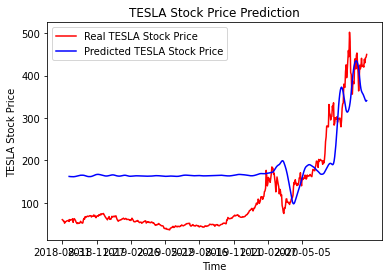

In [ ]:
#Bubild the LSTM Model

model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 200, batch_size = 32)

# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800-p, 1:2]
dataset_test = df.iloc[800-p:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
Y_test = []
for i in range(60, 588-p):
    X_test.append(inputs[i-60:i, 0])
    Y_test.append(inputs[i, 0])
X_test = np.array(X_test)
Y_test = np.array(Y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
print(Y_test.shape)
# (459, 60, 1)

#Make Predictions using the test set
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price.shape)

# Visualising the results
plt.plot(df.loc[800-p:, "Date"],dataset_test.values, color = "red" , label = "Real TESLA Stock Price")
plt.plot(df.loc[800+p:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,459,60))
plt.title("TESLA Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("TESLA Stock Price")
plt.legend()
plt.show()


# 7 days lag 60 time step: 
## dropout rate=0.05, epoch=200, number of layers=5  
### training error=0.0014
### Decrease dropout rate significant improves test error (can be observed in Plot)

Epoch 1/200
23/23 [==============================] - 1s 53ms/step - loss: 0.0868
Epoch 2/200
23/23 [==============================] - 1s 53ms/step - loss: 0.0204
Epoch 3/200
23/23 [==============================] - 1s 55ms/step - loss: 0.0171
Epoch 4/200
23/23 [==============================] - 1s 55ms/step - loss: 0.0166
Epoch 5/200
23/23 [==============================] - 1s 55ms/step - loss: 0.0160
Epoch 6/200
23/23 [==============================] - 1s 54ms/step - loss: 0.0162
Epoch 7/200
23/23 [==============================] - 1s 55ms/step - loss: 0.0174
Epoch 8/200
23/23 [==============================] - 1s 55ms/step - loss: 0.0161
Epoch 9/200
23/23 [==============================] - 1s 56ms/step - loss: 0.0161
Epoch 10/200
23/23 [==============================] - 1s 55ms/step - loss: 0.0160
Epoch 11/200
23/23 [==============================] - 1s 55ms/step - loss: 0.0153
Epoch 12/200
23/23 [==============================] - 1s 55ms/step - loss: 0.0162
Epoch 13/200
23/23 [=====

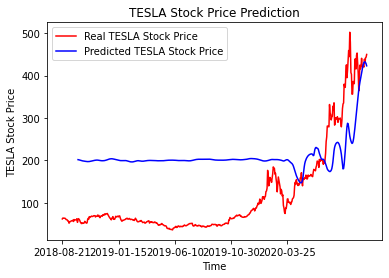

In [69]:
#Bubild the LSTM Model

model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.05))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.05))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.05))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.05))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 200, batch_size = 32)

# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800-p, 1:2]
dataset_test = df.iloc[800-p:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
Y_test = []
for i in range(60, 588-p):
    X_test.append(inputs[i-60:i, 0])
    Y_test.append(inputs[i, 0])
X_test = np.array(X_test)
Y_test = np.array(Y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
print(Y_test.shape)
# (459, 60, 1)

#Make Predictions using the test set
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price.shape)

# Visualising the results
plt.plot(df.loc[800-p:, "Date"],dataset_test.values, color = "red" , label = "Real TESLA Stock Price")
plt.plot(df.loc[800+p:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,459,100))
plt.title("TESLA Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("TESLA Stock Price")
plt.legend()
plt.show()

# 14 days lag 60 time step: 
## dropout rate=0.05, epoch=200, number of layers=5  
### training error=0.0020
### Increase time-lag worsen test error (can be observed in Plot)

Epoch 1/300
23/23 [==============================] - 3s 123ms/step - loss: 0.0579
Epoch 2/300
23/23 [==============================] - 3s 126ms/step - loss: 0.0212
Epoch 3/300
23/23 [==============================] - 3s 127ms/step - loss: 0.0184
Epoch 4/300
23/23 [==============================] - 3s 127ms/step - loss: 0.0193
Epoch 5/300
23/23 [==============================] - 3s 128ms/step - loss: 0.0210
Epoch 6/300
23/23 [==============================] - 3s 127ms/step - loss: 0.0184
Epoch 7/300
23/23 [==============================] - 3s 125ms/step - loss: 0.0159
Epoch 8/300
23/23 [==============================] - 3s 125ms/step - loss: 0.0134
Epoch 9/300
23/23 [==============================] - 3s 127ms/step - loss: 0.0128
Epoch 10/300
23/23 [==============================] - 3s 127ms/step - loss: 0.0131
Epoch 11/300
23/23 [==============================] - 3s 126ms/step - loss: 0.0115
Epoch 12/300
23/23 [==============================] - 3s 125ms/step - loss: 0.0122
Epoch 13/300


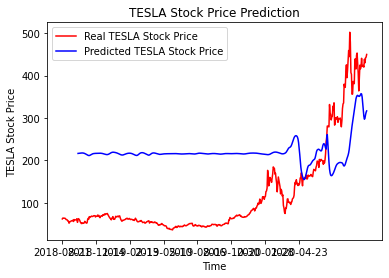

In [70]:
p=14
# Creating a data structure with 60 time-steps and 14 day output
X_train = []
y_train = []
for i in range(60, 800-p):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i+p, 0]) #14 lag day 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(734=800-(p-1), 60, 1)

#Bubild the LSTM Model

model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 200, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.05))
model.add(LSTM(units = 200, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.05))
model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.05))
model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.05))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.05))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.05))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.05))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 300, batch_size = 32)

# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800-p, 1:2]
dataset_test = df.iloc[800-p:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
Y_test = []
for i in range(60, 588-p):
    X_test.append(inputs[i-60:i, 0])
    Y_test.append(inputs[i, 0])
X_test = np.array(X_test)
Y_test = np.array(Y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
print(Y_test.shape)
# (459, 60, 1)

#Make Predictions using the test set
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price.shape)

# Visualising the results
plt.plot(df.loc[800-p:, "Date"],dataset_test.values, color = "red" , label = "Real TESLA Stock Price")
plt.plot(df.loc[800+p:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,459,60))
plt.title("TESLA Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("TESLA Stock Price")
plt.legend()
plt.show()


In [80]:
pred_test=df.iloc[len(dataset_total)-p:, 1:2]
#pred_test = pred_test.reshape(-1,1)
inputs = sc.transform(pred_test)
X_test = np.array(inputs)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
print(pred_test)
print(X_test)

(14, 1, 1)
            Open
1314  393.470001
1315  424.619995
1316  416.000000
1317  421.320007
1318  440.760010
1319  421.390015
1320  423.350006
1321  423.790009
1322  419.869995
1323  438.440002
1324  430.130005
1325  442.000000
1326  443.350006
1327  449.779999
[[[0.76676251]]

 [[0.83361947]]

 [[0.81511845]]

 [[0.82653673]]

 [[0.86826064]]

 [[0.82668699]]

 [[0.8308937 ]]

 [[0.83183808]]

 [[0.82342458]]

 [[0.86328123]]

 [[0.84544555]]

 [[0.87092202]]

 [[0.87381952]]

 [[0.88762016]]]


(14, 1)


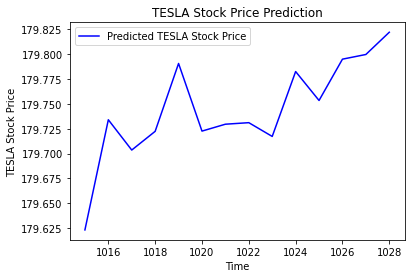

In [77]:
#Make Predictions using the test set
pred_stock_price = model.predict(X_test)
pred_stock_price = sc.inverse_transform(pred_stock_price)
print(pred_stock_price.shape)
predDate = pd.DataFrame([1015, 1016, 1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028],
     columns=['Date'])
# Visualising the results
plt.plot(predDate, pred_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
#plt.xticks(np.arange(0,459,60))
plt.title("TESLA Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("TESLA Stock Price")
plt.legend()
plt.show()

In [73]:
predDate = pd.DataFrame([1015, 1016, 1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028],
     columns=['Date'])

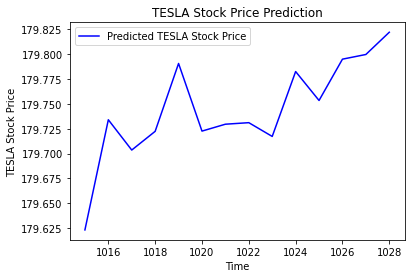

In [74]:

# Visualising the results
plt.plot(predDate, pred_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
#plt.xticks(np.arange(0,459,60))
plt.title("TESLA Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("TESLA Stock Price")
plt.legend()
plt.show()

In [ ]:
# Getting the predicted stock price of 2017
pred_test=df.iloc[len(dataset_total)-p:, 1:2]

dataset_train = df.iloc[:800-p, 1:2]
dataset_test = df.iloc[800-p:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
Y_test = []
for i in range(60, 588-p):
    X_test.append(inputs[i-60:i, 0])
    Y_test.append(inputs[i, 0])
X_test = np.array(X_test)
Y_test = np.array(Y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
print(Y_test.shape)
# (459, 60, 1)

#Make Predictions using the test set
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price.shape)

# Visualising the results
plt.plot(df.loc[800-p:, "Date"],dataset_test.values, color = "red" , label = "Real TESLA Stock Price")
plt.plot(df.loc[800+p:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,459,60))
plt.title("TESLA Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("TESLA Stock Price")
plt.legend()
plt.show()

# 14 days lag 60 time step: 
## dropout rate=0.05, epoch=300, number of layers=5  
### training error=0.0013
### Increase epoch significant improves test error (can be observed the trend in Plot)

Epoch 1/200
23/23 [==============================] - 0s 16ms/step - loss: 0.0687
Epoch 2/200
23/23 [==============================] - 0s 13ms/step - loss: 0.0199
Epoch 3/200
23/23 [==============================] - 0s 13ms/step - loss: 0.0177
Epoch 4/200
23/23 [==============================] - 0s 13ms/step - loss: 0.0161
Epoch 5/200
23/23 [==============================] - 0s 13ms/step - loss: 0.0169
Epoch 6/200
23/23 [==============================] - 0s 13ms/step - loss: 0.0170
Epoch 7/200
23/23 [==============================] - 0s 13ms/step - loss: 0.0159
Epoch 8/200
23/23 [==============================] - 0s 13ms/step - loss: 0.0166
Epoch 9/200
23/23 [==============================] - 0s 14ms/step - loss: 0.0160
Epoch 10/200
23/23 [==============================] - 0s 13ms/step - loss: 0.0171
Epoch 11/200
23/23 [==============================] - 0s 12ms/step - loss: 0.0169
Epoch 12/200
23/23 [==============================] - 0s 13ms/step - loss: 0.0169
Epoch 13/200
23/23 [=====

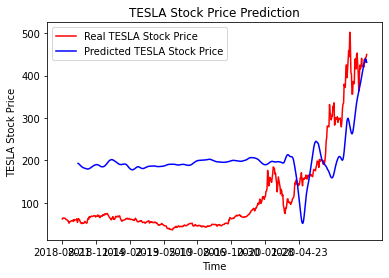

In [ ]:
#Bubild the LSTM Model

model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.05))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.05))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.05))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.05))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 200, batch_size = 32)

# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800-p, 1:2]
dataset_test = df.iloc[800-p:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
Y_test = []
for i in range(60, 588-p):
    X_test.append(inputs[i-60:i, 0])
    Y_test.append(inputs[i, 0])
X_test = np.array(X_test)
Y_test = np.array(Y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
print(Y_test.shape)
# (459, 60, 1)

#Make Predictions using the test set
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price.shape)

# Visualising the results
plt.plot(df.loc[800-p:, "Date"],dataset_test.values, color = "red" , label = "Real TESLA Stock Price")
plt.plot(df.loc[800+p:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,459,60))
plt.title("TESLA Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("TESLA Stock Price")
plt.legend()
plt.show()

# 14 days lag 60 time step: 
## dropout rate=0.05, epoch=200, number of layers=5  
### training error=0.0010
### Increase number of neurons in each layer causes over fitting problem (can be observed in Plot, i.e. the predicted blue line has raised points which actually not it the actual red curve)

Epoch 1/300
23/23 [==============================] - 0s 19ms/step - loss: 0.0514
Epoch 2/300
23/23 [==============================] - 0s 13ms/step - loss: 0.0174
Epoch 3/300
23/23 [==============================] - 0s 13ms/step - loss: 0.0178
Epoch 4/300
23/23 [==============================] - 0s 13ms/step - loss: 0.0186
Epoch 5/300
23/23 [==============================] - 0s 13ms/step - loss: 0.0165
Epoch 6/300
23/23 [==============================] - 0s 14ms/step - loss: 0.0170
Epoch 7/300
23/23 [==============================] - 0s 13ms/step - loss: 0.0157
Epoch 8/300
23/23 [==============================] - 0s 13ms/step - loss: 0.0176
Epoch 9/300
23/23 [==============================] - 0s 13ms/step - loss: 0.0159
Epoch 10/300
23/23 [==============================] - 0s 13ms/step - loss: 0.0152
Epoch 11/300
23/23 [==============================] - 0s 13ms/step - loss: 0.0153
Epoch 12/300
23/23 [==============================] - 0s 12ms/step - loss: 0.0168
Epoch 13/300
23/23 [=====

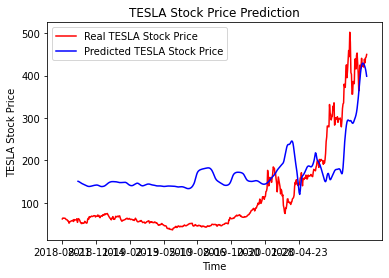

In [ ]:
#Bubild the LSTM Model

model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.05))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.05))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.05))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 100))
model.add(Dropout(0.05))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 300, batch_size = 32)

# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800-p, 1:2]
dataset_test = df.iloc[800-p:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
Y_test = []
for i in range(60, 588-p):
    X_test.append(inputs[i-60:i, 0])
    Y_test.append(inputs[i, 0])
X_test = np.array(X_test)
Y_test = np.array(Y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
print(Y_test.shape)
# (459, 60, 1)

#Make Predictions using the test set
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price.shape)

# Visualising the results
plt.plot(df.loc[800-p:, "Date"],dataset_test.values, color = "red" , label = "Real TESLA Stock Price")
plt.plot(df.loc[800+p:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,459,60))
plt.title("TESLA Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("TESLA Stock Price")
plt.legend()
plt.show()

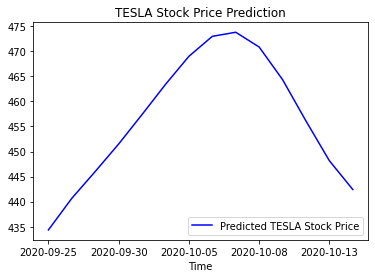

In [ ]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:(1328-14), 1:2]
dataset_test = df.iloc[(1328-14):, 1:2]

dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 74):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Make Predictions using the test set
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
# Visualising the results
plt.plot(df.loc[(1328-14):, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.title("TESLA Stock Price Prediction")
plt.xlabel("Time")
plt.xticks(np.arange(0,14,3))
plt.legend()
plt.show()